# Task 01
## Predicting Titanic Survival Using Python
### Submitted By: "Abdul Wahab"
### Submitted to: "CodSoft" 

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset into our Jupyter Notebook

In [2]:
titanic = pd.read_csv("tested.csv")

#### Printing First 5 rows of Dataseet

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1. Data Cleaning
#### First of all we need to do cleaning to further proceed with our dataset.
-> Lets see some information about dataset.

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic.shape

(418, 12)

#### Looks like age column have some missing values, so we need to deal with it.

In [7]:
titanic['Age'].count()

332

#### Dropping Age column

In [8]:
titanic.drop('Age', axis=1, inplace=True)

In [9]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S


#### Dropping Cabin column as well
cabin column has only Nan values so dropping column.

In [10]:
titanic.drop('Cabin', axis=1, inplace=True)

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


#### Changing the sex column values form male and female to 1 and 0 to make it easy for our analysis.

In [12]:
titanic['Sex'] = titanic['Sex'].replace({'male': 1, 'female': 0})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,3101298,12.2875,S


### 2. Data Analysis
#### After Data Cleaning, the next step is to do data analysis so that we can finally build a model that can predict Survivals.

Lets take a look at the survival column

In [13]:
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

#### Here 0 in the survived column mean that not survived and 1 mean survived.
As we can see that there are more people died than survived regarding this dataset.

#### Lets visualize the count of passengers w.r.t Pclass( 1- First_class, 2- Second_class, 3- Third_ckass)

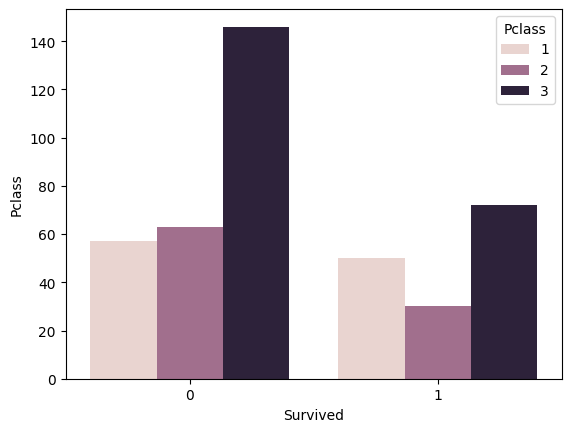

In [14]:
sns.countplot(x=titanic['Survived'], hue=titanic['Pclass'])
plt.xlabel('Survived')
plt.ylabel('Pclass')
plt.show()

### Lets visualize the count of survivals w.r.t gender.

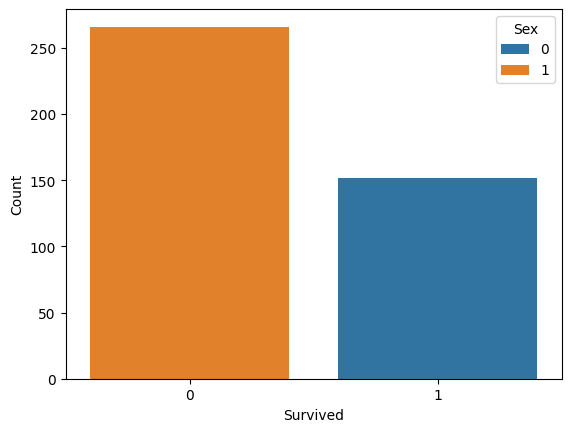

In [15]:
sns.countplot(x=titanic['Survived'], hue=titanic['Sex'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### 3. Model Training

#### For our model training, we need only two columns from our DataFrame.
These Columns are 'Pclass' and 'Sex' columns.

In [16]:
X = titanic[['Pclass','Sex']]
Y = titanic['Survived']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0) 

In [18]:
from sklearn.linear_model import LogisticRegression

regr = LogisticRegression(random_state=0)
regr.fit(X_train,Y_train)


LogisticRegression(random_state=0)

### 4. Model Prediction

In [19]:
predictions = regr.predict(X_test)
print(predictions)

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [20]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


#### Accuracy of Model

In [21]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### User Perspective

In [22]:
import warnings
warnings.filterwarnings("ignore")

print("Predicting Whether a person survived or not in Titaic Incident")
pclass = int(input("Enter Class of titanic from 1 to 3:"))
sex =int(input("Enter Gender, 1 for male, 0 for female:"))

ans = regr.predict([[pclass,sex]])

if ans == 0:
    print("Not Survived")
else:
    print("Survived")

Predicting Whether a person survived or not in Titaic Incident
Not Survived
